# **Selecting the best pipeline**

> **In this section we are going to rank all the pipelines (preprocessing + model) according to the inner evaluation results (considering all the rounds). In a nutshell, we are going to identify the best pipeline over all.**

## **Requirements**

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## **Selecting the best pipeline**

We rank the all the alternatives that we have evaluated (1046 in total!) according to their inner balanced accuracy, and highlight the best one, that will be the one chosen as final pipeline, and it would be the one we would use for classifying new patients.

In [6]:
inner_score, best_params, inner_results = {}, {}, {}

rounds = [1,2,3,4,5]

for round in rounds:

    with open(f'results/best_params_{round}', 'rb') as file:
            best_params[round] = pickle.load(file)

    with open(f'results/inner_scores_{round}', 'rb') as file:
            inner_score[round] = pickle.load(file)

    with open(f'results/inner_results_{round}', 'rb') as file:
            inner_results[round] = pickle.load(file)

In [7]:
inner_score_flatten, best_params_flatten, inner_results_flatten = {}, {}, {}

for round in [1,2,3,5]:

    inner_score_flatten.update({key1 + '__' + key2 + '__' + key3 : inner_score[round][key1][key2][key3]  
                        for key1 in inner_score[round].keys() 
                        for key2 in inner_score[round][key1].keys() 
                        for key3 in inner_score[round][key1][key2].keys()})
        
    best_params_flatten.update({key1 + '__' + key2 + '__' + key3 : best_params[round][key1][key2][key3]  
                        for key1 in best_params[round].keys() 
                        for key2 in best_params[round][key1].keys() 
                        for key3 in best_params[round][key1][key2].keys()})
    
    inner_results_flatten.update({key1 + '__' + key2 + '__' + key3 : inner_results[round][key1][key2][key3]  
                            for key1 in inner_results[round].keys() 
                            for key2 in inner_results[round][key1].keys() 
                            for key3 in inner_results[round][key1][key2].keys()})
    
inner_score_flatten.update(inner_score[4])
best_params_flatten.update(best_params[4])
inner_results_flatten.update(inner_results[4])

inner_score_values = np.array(list(inner_score_flatten.values()))
pipelines_names = np.array(list(inner_score_flatten.keys()))
best_pipeline = pipelines_names[np.argmax(inner_score_values)]
score_best_pipeline = np.max(inner_score_values)

combined_models_score = list(zip(pipelines_names, inner_score_values))
sorted_combined_models_score= sorted(combined_models_score, key=lambda x: x[1], reverse=True)  # Sort from greater to lower
sorted_pipelines, sorted_scores = zip(*sorted_combined_models_score)
sorted_pipelines = list(sorted_pipelines)
sorted_scores = list(sorted_scores)

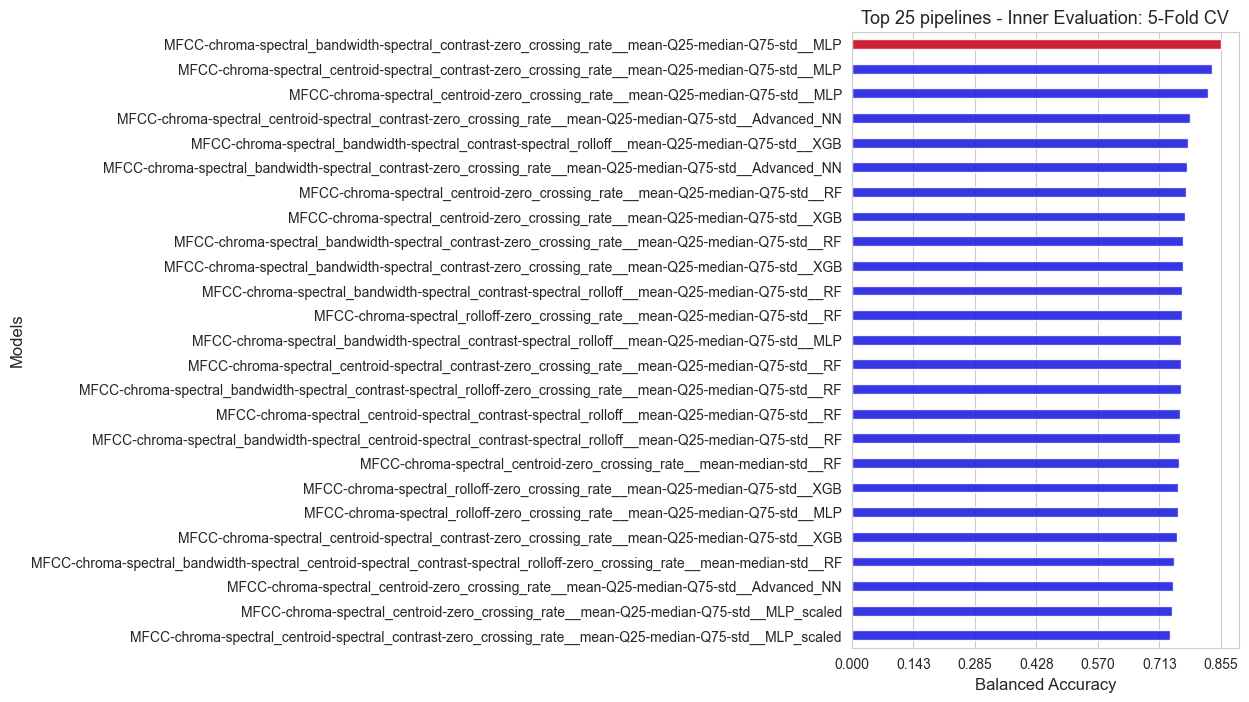

The best pipeline among all the 1046 alternatives, according to the inner evaluation, is: MFCC-chroma-spectral_bandwidth-spectral_contrast-zero_crossing_rate__mean-Q25-median-Q75-std__MLP
Balanced accuracy of the best model:  0.855

 Best feature extraction method:  MFCC-chroma-spectral_bandwidth-spectral_contrast-zero_crossing_rate 
 Best stats:  mean-Q25-median-Q75-std 
 Best model:  MLP

The best model hyper-parameters are:  {'learning_rate_init': 0.0007230035617449583, 'alpha': 0.0015684955983016854, 'activation': 'logistic', 'hidden_layer_sizes': 300, 'max_iter': 300}


In [8]:
n_top = 25

fig, axes = plt.subplots(figsize=(5,8))

ax = sns.barplot(y=sorted_pipelines[0:n_top], x=sorted_scores[0:n_top], color='blue', width=0.4, alpha=0.9)
ax = sns.barplot(y=[best_pipeline], x=[score_best_pipeline], color='red', width=0.4, alpha=0.9)

ax.set_ylabel('Models', size=12)
ax.set_xlabel('Balanced Accuracy', size=12)
ax.set_xticks(np.round(np.linspace(0, np.max(inner_score_values), 7),3)) 
ax.tick_params(axis='y', labelsize=10)    
plt.title(f'Top {n_top} pipelines - Inner Evaluation: 5-Fold CV', size=13)
plt.show()

print(f'The best pipeline among all the {len(sorted_scores)} alternatives, according to the inner evaluation, is: {best_pipeline}')
print('Balanced accuracy of the best model: ', np.round(score_best_pipeline, 3))
best_method = best_pipeline.split('__')[0]
best_stats = best_pipeline.split('__')[1]
best_model = best_pipeline.split('__')[2]
print('\n Best feature extraction method: ', best_method, '\n', 'Best stats: ', best_stats, '\n', 'Best model: ', best_model)

print('\nThe best model hyper-parameters are: ', best_params_flatten[best_pipeline])

The next step is to make an **estimation of the future performance** of the best pipeline, that is, how it would work classifying the level of PD of new patients, based in their voice. This part is called **outer evaluation**.

We save key results to be used in the outer evaluation part.

In [9]:
# Saving results 
'''
with open('results/final_best_method', 'wb') as file:
    pickle.dump(best_method, file)

with open('results/final_best_stats', 'wb') as file:
    pickle.dump(best_stats, file)

with open('results/final_best_model', 'wb') as file:
    pickle.dump(best_model, file)
'''